In [1]:
import pandas as pd
import numpy as np

#### Data Read

In [2]:
data01 = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_계근량(19)_v5.csv', encoding='ANSI')
data02 = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_계근량(20)_v6.csv', encoding='ANSI')

df_19_01 = pd.DataFrame(data01)
df_20_01 = pd.DataFrame(data02)

df_20_01.head(5)

계량일   상차시각  수거시간    거래처  차량번호      품목   실중량
0  2020-01-01  15:38     0  동탄출장소   279  폐합성수지류  1590
1  2020-01-02   9:57     0    반월동  9184  폐합성수지류   300
2  2020-01-02  10:04   120   병점2동  8544  폐합성수지류    20
3  2020-01-02  10:10   300    정남면  9144  폐합성수지류   590
4  2020-01-02  10:11   240    기배동  7934  폐합성수지류   360

In [3]:
data03 = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/업체별 처리구역(2001).csv', encoding='utf-8')
df_com = pd.DataFrame(data03)
df_com

구분      업체명                   담당구역(행정동)  \
0    1구역   ㈜은호ENT                  동탄2동, 동탄3동   
1    2구역    ㈜원천환경              병점2동, 반월동, 진안동   
2    3구역      ㈜평촌               봉담읍, 매송면, 비봉면   
3    4구역      ㈜화성  남양읍, 마도면, 송산면, 서신면, 송산그린시티   
4    5구역    향원실업㈜                         향남읍   
5    7구역    신양환경㈜          우정읍, 장안면, 양감면, 팔탄면   
6    9구역    ㈜나눔환경                  동탄6동, 동탄7동   
7   10구역  ㈜크린씨티화성         병점1동, 화산동, 기배동, 정남면   
8   11구역    부경크린㈜                        동탄1동   
9   12구역    개미환경㈜                        동탄5동   
10  13구역    ㈜유나이트                        동탄4동   
11  14구역    ㈜바른환경                        동탄8동   

                                    담당구역(법정동)                    사무실 전화번호  \
0     반송동(동탄문화센터로 남측일원), \n능동(화성동탄1택지개발지구 포함)                031-376-9221   
1                    병점중앙로 서측일원, 반월동, 진안동, 능동  031-353-7333\n031-353-7334   
2                               봉담읍, 매송면, 비봉면                031-353-6263   
3                     남양읍, 마도면, 송산면, 서신면, 새솔동                031-227-5157   
4                                         향남읍                031-351-3223   
5                          우정읍, 장안면, 양감면, 팔탄면                031-291-3437   
6             오산동, 방교동, 금곡동, 송동,\n산척동, 목동, 신동                031-366-2323   
7   병점중앙로 동측일원, 황계동, 송산동,\n안녕동, 배양동, 기안동, 정남면                031-227-3391   
8                      반송동(동탄문화센터로 북측일원), 석우동                031-352-1708   
9                                     영천동, 중동                031-297-3500   
10                                        청계동                031-354-2539   
11                                        장지동                031-895-5096   

                    주소지  
0         정남면 신백길 12-44  
1      향남읍 만년로 151번길 62  
2        향남읍 한두골길 21-53  
3        봉담읍 분천길95번길 88  
4   장안면 3.1만세로 322번길 41  
5       봉담읍 하가등안길 100-6  
6          팔탄면 신양1길 133  
7     세자로 274번길 42(안녕동)  
8         향남읍 푸른들판로 343  
9          봉담읍 태봉길 41-1  
10           병점동로 120-5  
11          안녕남로 140번길8

In [4]:
org_list = ['(주)은호ENT','(주)원천환경','(주)평촌','(주)화성','(주)향원실업','(주)신양환경','(주)나눔환경','(주)크린시티화성',
           '(주)부경크린','(주)개미환경','(주)유나이트','(주)바른환경']

In [5]:
# 업체명 : 담당구역(행정동) 확인
df_com = df_com[['구분','업체명','담당구역(행정동)','담당구역(법정동)']]
df_com

# 구역 dict 생성
## 중량데이터에는 업체명 표준화가 적용되어 있으므로 표준 리스트 사용
org_num = {}

for org in org_list :
    org_num[org] = org_list.index(org) + 1
org_num

{'(주)은호ENT': 1,
 '(주)원천환경': 2,
 '(주)평촌': 3,
 '(주)화성': 4,
 '(주)향원실업': 5,
 '(주)신양환경': 6,
 '(주)나눔환경': 7,
 '(주)크린시티화성': 8,
 '(주)부경크린': 9,
 '(주)개미환경': 10,
 '(주)유나이트': 11,
 '(주)바른환경': 12}

&nbsp;  
### 1 &nbsp; 처리구역 생성

In [6]:
# 거래처명-처리구역 치환 함수 생성
def org_ch(name) :
    
    org_list = ['(주)은호ENT','(주)원천환경','(주)평촌','(주)화성','(주)향원실업','(주)신양환경','(주)나눔환경','(주)크린시티화성',
           '(주)부경크린','(주)개미환경','(주)유나이트','(주)바른환경']
    
    org_num = {'(주)은호ENT': 1, '(주)원천환경': 2, '(주)평촌': 3, '(주)화성': 4, '(주)향원실업': 5, '(주)신양환경': 6, '(주)나눔환경': 7,
           '(주)크린시티화성': 8, '(주)부경크린': 9, '(주)개미환경': 10, '(주)유나이트': 11, '(주)바른환경': 12}
    
    if name in org_list :
        name = org_num[name]
    return name

- 2019년

In [7]:
# 2019년 거래처명 -> 처리구역
## apply에서 axis==1 : row 기준 -> lambda 함수에서 row를 호출
df_19_01['거래처'] = df_19_01.apply(lambda x : org_ch(x['거래처']), axis = 1)

df_19_01.head(5)

계량일     계량시간                       수거시간        거래처  차량번호     품목  \
0  2019-01-01  7:24:36  0 days 00:00:00.000000000          8  3228    음식물   
1  2019-01-01  7:28:25  0 days 00:13:50.000000000  에코한마음협동조합   416  스티로폼류   
2  2019-01-01  7:30:38  0 days 00:19:24.000000000          5  2460  스티로폼류   
3  2019-01-01  7:38:17  0 days 00:14:41.000000000          9  6371  스티로폼류   
4  2019-01-01  7:55:46  0 days 00:06:50.000000000          4  9011    폐토사   

    실중량  
0  1480  
1   180  
2   170  
3   220  
4  1190

In [8]:
print(set(df_19_01['거래처']), sep ='\t')

{nan, 1, 2, 3, 4, 5, 6, 7, 8, 9, '이레자원', 10, 11, '에코한마음협동조합', '화성그린환경센터', '미래재단', '지역개발사업소 산림녹지과', '광진데코', '남양읍', '전곡항', '세종환경(주)', '에코한마음', '팔탄', '국화도', '(주)더위더스', '자원화노면청소', '동탄출장소', '송산면', '반월동', '정남면', '엘 피 케이', '양감면', '동탄2동', '동탄1동', '영진자원재생', '신대한정유', '도로입양', '봉담읍', '전몰군경유족회', '월남참전전우회', '매송면', '장안면', '세종환경', '현대연구소', '대화안전관리', '마도', '병점1동', '월남전참전회', '현화환경', '청한공영(주)', '동부출장소', '동탄7동', '비봉면', '(주)피앤피시스템', '(사)미래재단', '동탄3동', '제이스건설', '서신면', '고염제', '에코센터', '기아자동차', '동탄4동', '병점2동', '도로관리과', '향남읍', '화산동', '주광건설', '동탄6동', '(주)엘피케이', '특수미래제단', '지채장회협회', 'BSP경호단', '마도면', '자원화시설', '다누림사회', '새솔동', '우정읍', '특수임무유공자회', '(주)피앤피', '화성시청', '동탄8동', '보건소', '자원순환과', '팔탄면', '동탄5동', '기배동', '자연수지', '진안동'}


- 2020년

In [9]:
# 2020년 거래처명 -> 처리구역
## apply에서 axis==1 : row 기준 -> lambda 함수에서 row를 호출
df_20_01['거래처'] = df_20_01.apply(lambda x : org_ch(x['거래처']), axis = 1)

df_20_01.head(10)

계량일   상차시각  수거시간    거래처  차량번호      품목   실중량
0  2020-01-01  15:38     0  동탄출장소   279  폐합성수지류  1590
1  2020-01-02   9:57     0    반월동  9184  폐합성수지류   300
2  2020-01-02  10:04   120   병점2동  8544  폐합성수지류    20
3  2020-01-02  10:10   300    정남면  9144  폐합성수지류   590
4  2020-01-02  10:11   240    기배동  7934  폐합성수지류   360
5  2020-01-02  10:32   540   동탄2동  1959  폐합성수지류    40
6  2020-01-02  10:48     0  동부출장소  4734  폐합성수지류   180
7  2020-01-02  10:55     0  동부출장소  7628     폐토사  4230
8  2020-01-02  11:51   240      1   898  폐합성수지류   220
9  2020-01-02  12:22   300      9  2493  폐합성수지류   610

In [10]:
print(set(df_20_01['거래처']), sep ='\t')

{nan, 1, 2, 3, 4, 5, 6, 7, 8, 9, '영진자원재생', 11, 10, 12, '더부름', '에코한마음협동조합', '송산', '화성그린환경센터', '지역개발사업소 산림녹지과', '동부출장소', '제일그린', '동탄7동', '이크린', '서부수도권자원순환센', '남양읍', '비봉면', '유한회사 이크린', '마도면', '자원화시설', '우렁각시매직케어', '동탄6동', '동탄3동', '새솔동', '동우상사', '우정읍', '서신면', '동탄청우실업', '국화도', '산림녹지과', '팔탄', '봉담읍', '동탄출장소', '기아자동차', '송산면', '동탄4동', '반월동', '병점2동', '정남면', '(주)(주)향원실업', '우렁각시', '동탄8동', '보건소', '매송면', '장안면', '동호산업', '자원순환과', '도로관리과', '양감면', '향남읍', '팔탄면', '현대연구소', '마도', '동탄5동', '대화안전관리', '동탄2동', '화산동', '기배동', '동탄1동', '병점1동', '더브룸', '바른환경', '진안동'}


&nbsp;  
### 2 &nbsp; 행정동 조회

In [11]:
gis_pol = ['동탄3동', '병점2동', '동탄1동', '반월동', '동탄2동', '기배동', '정남면', '화산동', '병점1동', '비봉면', '장안면', '봉담읍',
           '팔탄면', '향남읍', '양감면', '매송면', '우정읍', '진안동', '남양읍', '서신면', '송산면', '마도면', '동탄4동', '동탄5동',
           '동탄6동', '동탄7동', '동탄8동','새솔동']

org_list = ['(주)은호ENT','(주)원천환경','(주)평촌','(주)화성','(주)향원실업','(주)신양환경','(주)나눔환경','(주)크린시티화성',
           '(주)부경크린','(주)개미환경','(주)유나이트','(주)바른환경']

In [12]:
# 추가함수 정의
def org_re(name) :
    
    org_dic_plus = {'(주)(주)향원실업':'(주)향원실업', '바른환경': '(주)바른환경', '마도':'마도면', '팔탄':'팔탄면'}
    
    if name in list(org_dic_plus.keys()) :
        name = org_dic_plus[name]
    return name

In [13]:
# 처리구역 추가 표준화
## apply에서 axis==1 : row 기준 -> lambda 함수에서 row를 호출
df_20_01['거래처'] = df_20_01.apply(lambda x : org_re(x['거래처']), axis = 1)

df_20_01['거래처'].unique()

array(['동탄출장소', '반월동', '병점2동', '정남면', '기배동', '동탄2동', '동부출장소', 1, 9, 7,
       '동탄4동', 8, '진안동', '화산동', '동탄1동', 3, '영진자원재생', 2, 5, 11, 4, 10, 6,
       '팔탄면', '장안면', 12, '향남읍', '자원화시설', '양감면', '남양읍', '우정읍', '봉담읍',
       '동탄5동', '병점1동', '비봉면', '송산면', '마도면', '보건소', '서신면', '(주)바른환경',
       '매송면', '동탄3동', '현대연구소', '에코한마음협동조합', '자원순환과', '화성그린환경센터',
       '우렁각시매직케어', '새솔동', '동탄6동', '동탄8동', '지역개발사업소 산림녹지과', '기아자동차',
       '유한회사 이크린', '동탄7동', '동우상사', '동호산업', '산림녹지과', '동탄청우실업',
       '서부수도권자원순환센', '도로관리과', '국화도', nan, '제일그린', '더브룸', '(주)향원실업', '송산',
       '더부름', '이크린', '대화안전관리', '우렁각시'], dtype=object)

- 알 수 없는 처리구역 결측치 처리

In [14]:
# 알 수 없는 처리구역 결측치 처리
for pol_name in (gis_pol + list(range(1,13)) :
    df_20_01['거래처'] =  df_20_01.apply(lambda x : 0 )

SyntaxError: invalid syntax (<ipython-input-14-03eba423aba4>, line 2)

In [15]:
# 함수정의
def pol_ch(name) :
    
    gis_pol = ['동탄3동', '병점2동', '동탄1동', '반월동', '동탄2동', '기배동', '정남면', '화산동', '병점1동', '비봉면', '장안면', '봉담읍',
           '팔탄면', '향남읍', '양감면', '매송면', '우정읍', '진안동', '남양읍', '서신면', '송산면', '마도면', '동탄4동', '동탄5동',
           '동탄6동', '동탄7동', '동탄8동','새솔동']
    
    if name not in (gis_pol + list(range(1,13))) :
        name = 0
    return name

In [16]:
# 2020년 적용
df_20_01['거래처'] = df_20_01.apply(lambda x : pol_ch(x['거래처']), axis = 1)
df_20_01.head(5)

계량일   상차시각  수거시간   거래처  차량번호      품목   실중량
0  2020-01-01  15:38     0     0   279  폐합성수지류  1590
1  2020-01-02   9:57     0   반월동  9184  폐합성수지류   300
2  2020-01-02  10:04   120  병점2동  8544  폐합성수지류    20
3  2020-01-02  10:10   300   정남면  9144  폐합성수지류   590
4  2020-01-02  10:11   240   기배동  7934  폐합성수지류   360

In [17]:
## 결측치 확인
print(len(df_20_01[df_20_01['거래처']==0]))  ## 4614
print(len(df_20_01))  ## 37728

4614
37728


### 3 품목 기준 총 수거량 산출
#### case1 : 결측치 포함

In [18]:
# 처리구역 list
pol_list = gis_pol + list(range(1,13))

In [41]:
# 함수정의
def pol_sum(name) :
    
    a = []
    mid = df_20_01[df_20_01['거래처']==name]
    
    for trash in set(df_20_01.품목) :
        value = mid[mid['품목'] == trash]['실중량'].sum(axis=0)
        a.append(value)
    
    return a

In [38]:
df_20_S = pd.DataFrame(columns = ['품목'] + pol_list)

df_20_S['품목'] = list(set(df_20_01.품목))

for pol_name in pol_list :
    
    df_20_mid = pol_sum(pol_name)
    df_20_S[pol_name] = df_20_mid
    
    df_20_mid = []

df_20_S

품목  동탄3동   병점2동   동탄1동    반월동  동탄2동     기배동     정남면    화산동   병점1동  \
0   폐합성수지류  2220  10450  16430  18590  9850  109940  171650  35000  23800   
1    스티로폼류     0      0      0      0     0       0       0      0      0   
2      음식물     0      0      0      0     0       0       0      0      0   
3      종이류  1000    280    400    180   480     210      30    270    290   
4    대형폐기물     0      0      0      0     0       0       0      0      0   
5     폐건전지   210    420    730    230   290      80       0    250    880   
6      패각류     0      0      0      0     0       0       0      0      0   
7    일반폐기물     0      0      0      0     0    1190       0      0      0   
8      폐토사     0      0      0      0     0       0       0      0      0   
9    재활용기타     0      0      0      0     0       0       0      0      0   
10   도자기편류     0      0      0      0     0       0       0      0      0   
11    폐형광등     0    100    190     10     0       0     190     80    410   

    ...        3        4        5        6        7        8        9  \
0   ...     1280        0        0     1060   166460   108810   161310   
1   ...   114090   113980    96770    26210   178870    46450    82640   
2   ...  4290280  3803710  3548390  1842400        0  3539480        0   
3   ...       40      460      360        0      260       70    20260   
4   ...   547060   109750   274150      770       70   109010   225230   
5   ...     1470     3610     6520     4170    78210     2960     5820   
6   ...        0   361530        0     1390        0        0        0   
7   ...  1938240  2010940  2068220  1472580  2050150  2001180  1401160   
8   ...    59780   124640    61780    68200      640    65190    19290   
9   ...     2120     1300        0        0        0      920     1250   
10  ...     2300     1020     2520      600     2720     4250     2020   
11  ...     6110     4190     5890     2970    12920     6020     8030   

         10      11      12  
0       450       0       0  
1     65690   73270   42680  
2    325360       0       0  
3         0       0    3670  
4       100    1390       0  
5      9830    6730   19040  
6         0       0       0  
7   1009170  993580  353070  
8      6300       0     360  
9         0       0       0  
10      990    1290      90  
11     2830    5700    9150  

[12 rows x 41 columns]

In [68]:
# 합계 행 추가
df_20_S.loc[12] = df_20_S.sum(axis=0)
df_20_S.loc[12,'품목'] = '계'
df_20_S

품목    동탄3동     병점2동     동탄1동      반월동     동탄2동       기배동       정남면  \
0   폐합성수지류  2220.0  10450.0  16430.0  18590.0   9850.0  109940.0  171650.0   
1    스티로폼류     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
2      음식물     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
3      종이류  1000.0    280.0    400.0    180.0    480.0     210.0      30.0   
4    대형폐기물     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
5     폐건전지   210.0    420.0    730.0    230.0    290.0      80.0       0.0   
6      패각류     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
7    일반폐기물     0.0      0.0      0.0      0.0      0.0    1190.0       0.0   
8      폐토사     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
9    재활용기타     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
10   도자기편류     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
11    폐형광등     0.0    100.0    190.0     10.0      0.0       0.0     190.0   
12       계  3430.0  11250.0  17750.0  19010.0  10620.0  111420.0  171870.0   

        화산동     병점1동  ...          3          4          5          6  \
0   35000.0  23800.0  ...     1280.0        0.0        0.0     1060.0   
1       0.0      0.0  ...   114090.0   113980.0    96770.0    26210.0   
2       0.0      0.0  ...  4290280.0  3803710.0  3548390.0  1842400.0   
3     270.0    290.0  ...       40.0      460.0      360.0        0.0   
4       0.0      0.0  ...   547060.0   109750.0   274150.0      770.0   
5     250.0    880.0  ...     1470.0     3610.0     6520.0     4170.0   
6       0.0      0.0  ...        0.0   361530.0        0.0     1390.0   
7       0.0      0.0  ...  1938240.0  2010940.0  2068220.0  1472580.0   
8       0.0      0.0  ...    59780.0   124640.0    61780.0    68200.0   
9       0.0      0.0  ...     2120.0     1300.0        0.0        0.0   
10      0.0      0.0  ...     2300.0     1020.0     2520.0      600.0   
11     80.0    410.0  ...     6110.0     4190.0     5890.0     2970.0   
12  35600.0  25380.0  ...  6962770.0  6535130.0  6064600.0  3420350.0   

            7          8          9         10         11        12  
0    166460.0   108810.0   161310.0      450.0        0.0       0.0  
1    178870.0    46450.0    82640.0    65690.0    73270.0   42680.0  
2         0.0  3539480.0        0.0   325360.0        0.0       0.0  
3       260.0       70.0    20260.0        0.0        0.0    3670.0  
4        70.0   109010.0   225230.0      100.0     1390.0       0.0  
5     78210.0     2960.0     5820.0     9830.0     6730.0   19040.0  
6         0.0        0.0        0.0        0.0        0.0       0.0  
7   2050150.0  2001180.0  1401160.0  1009170.0   993580.0  353070.0  
8       640.0    65190.0    19290.0     6300.0        0.0     360.0  
9         0.0      920.0     1250.0        0.0        0.0       0.0  
10     2720.0     4250.0     2020.0      990.0     1290.0      90.0  
11    12920.0     6020.0     8030.0     2830.0     5700.0    9150.0  
12  2490300.0  5884340.0  1927010.0  1420720.0  1081960.0  428060.0  

[13 rows x 41 columns]

In [ ]:
# column 수정
df_20_S.columns = ['품목', '동탄3동', '병점2동', '동탄1동',  '반월동', '동탄2동',  '기배동',  '정남면',  '화산동',
       '병점1동',  '비봉면',  '장안면',  '봉담읍',  '팔탄면',  '향남읍',  '양감면',  '매송면',  '우정읍',
        '진안동',  '남양읍',  '서신면',  '송산면',  '마도면', '동탄4동', '동탄5동', '동탄6동', '동탄7동',
       '동탄8동',  '새솔동', '구역1', '구역2', '구역3', '구역4', '구역5', '구역6', '구역7', '구역8', '구역9', '구역10', '구역11', '구역12', ]

In [100]:
# 행정동 분리
df_20_dong = df_20_S[['품목','동탄3동', '병점2동', '동탄1동',  '반월동', '동탄2동',  '기배동',  '정남면',  '화산동',
       '병점1동',  '비봉면',  '장안면',  '봉담읍',  '팔탄면',  '향남읍',  '양감면',  '매송면',  '우정읍',
        '진안동',  '남양읍',  '서신면',  '송산면',  '마도면', '동탄4동', '동탄5동', '동탄6동', '동탄7동',
       '동탄8동',  '새솔동']].copy()
df_20_dong.head(5)

# 처리구역 분리
df_20_pol = df_20_S.drop(['동탄3동', '병점2동', '동탄1동',  '반월동', '동탄2동',  '기배동',  '정남면',  '화산동', '병점1동',  '비봉면',  '장안면',
                          '봉담읍',  '팔탄면',  '향남읍',  '양감면',  '매송면',  '우정읍', '진안동',  '남양읍',  '서신면',  '송산면',  '마도면',
                          '동탄4동', '동탄5동', '동탄6동', '동탄7동','동탄8동',  '새솔동'], axis=1).copy()
df_20_pol.head(5)

## 처리구역 처리 시 구역으로 column 추출하면 튜플이 나옴. 

품목       구역1       구역2        구역3        구역4        구역5        구역6  \
0  폐합성수지류   53210.0   44360.0     1280.0        0.0        0.0     1060.0   
1   스티로폼류  111250.0  109280.0   114090.0   113980.0    96770.0    26210.0   
2     음식물       0.0       0.0  4290280.0  3803710.0  3548390.0  1842400.0   
3     종이류    1570.0     930.0       40.0      460.0      360.0        0.0   
4   대형폐기물  551690.0  422620.0   547060.0   109750.0   274150.0      770.0   

        구역7        구역8       구역9      구역10     구역11     구역12  
0  166460.0   108810.0  161310.0     450.0      0.0      0.0  
1  178870.0    46450.0   82640.0   65690.0  73270.0  42680.0  
2       0.0  3539480.0       0.0  325360.0      0.0      0.0  
3     260.0       70.0   20260.0       0.0      0.0   3670.0  
4      70.0   109010.0  225230.0     100.0   1390.0      0.0

In [101]:
# csv save
df_20_pol.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체계근량(20)_처리구역.csv',
               encoding='ANSI', index=False)
df_20_dong.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체계근량(20)_행정동.csv',
               encoding='ANSI', index=False)

#### 검증
- row 합계와 품목별 합계 대조

In [45]:
# '음식물' == 17349620
df_20_S[df_20_S['품목']=='음식물'].sum(axis=1)  ## 일치

2    17349620
dtype: int64

In [47]:
# csv save
df_20_S.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체계근량(20)_공간결합.csv',
               encoding='ANSI', index=False)

---

&nbsp;  
### 4 속성결합
- QGIS로 처리구역 병합한 csv data read --> X
- QGIS 속성테이블에서 바로 입력함

In [55]:
data_pol = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/GIS/처리구역.csv', encoding='utf-8')
df_pol = pd.DataFrame(data_pol)
df_pol

FTR_CDE   HJD_CDE HJD_NAM  SHAPE_AREA  SHAPE_LEN layer  \
0    UC300  41590590    동탄5동         0.0        0.0  구역10   
1    UC300  41590588    동탄4동         0.0        0.0  구역11   
2    UC300  41590620    동탄8동         0.0        0.0  구역12   
3    UC300  41590259     향남읍         0.0        0.0   구역5   
4    UC300  41590585    동탄1동         0.0        0.0   구역9   
5    UC300  41590540    병점2동         0.0        0.0   구역2   
6    UC300  41590370     장안면         0.0        0.0   구역6   
7    UC300  41590587    동탄3동         0.0        0.0   구역1   
8    UC300  41590320     비봉면         0.0        0.0   구역3   
9    UC300  41590560     기배동         0.0        0.0   구역8   
10   UC300  41590262     남양읍         0.0        0.0   구역4   
11   UC300  41590600    동탄6동         0.0        0.0   구역7   

                                                 path  
0                             구역10.shp|layername=구역10  
1                             구역11.shp|layername=구역11  
2                             구역12.shp|layername=구역12  
3                               구역5.shp|layername=구역5  
4                               구역9.shp|layername=구역9  
5   MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...  
6   MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...  
7   MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...  
8   MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...  
9   MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...  
10  MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...  
11  MultiPolygon?crs=wkt:PROJCRS["PCS_ITRF2000_TM"...

In [114]:

## dataframe transpose 할 때 column 설정이 이상함 -> excel에서 계만 처리

data_we = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체계근량(20)_처리구역_sum.csv', encoding='ANSI')
df_we = pd.DataFrame(data_we)
df_we

layer        계
0    1구역  2151120
1    2구역  2587640
2    3구역  6962770
3    4구역  6535130
4    5구역  6064600
5    7구역  3420350
6    9구역  2490300
7   10구역  5884340
8   11구역  1927010
9   12구역  1420720
10  13구역  1081960
11  14구역   428060

In [118]:
df_20_pol.columns = ['품목','구역1','구역2','구역3','구역4','구역5','구역7','구역9','구역10','구역11','구역12','구역13','구역14']
df_20_pol

품목        구역1        구역2        구역3        구역4        구역5        구역7  \
0   폐합성수지류    53210.0    44360.0     1280.0        0.0        0.0     1060.0   
1    스티로폼류   111250.0   109280.0   114090.0   113980.0    96770.0    26210.0   
2      음식물        0.0        0.0  4290280.0  3803710.0  3548390.0  1842400.0   
3      종이류     1570.0      930.0       40.0      460.0      360.0        0.0   
4    대형폐기물   551690.0   422620.0   547060.0   109750.0   274150.0      770.0   
5     폐건전지     8440.0     3430.0     1470.0     3610.0     6520.0     4170.0   
6      패각류        0.0        0.0        0.0   361530.0        0.0     1390.0   
7    일반폐기물  1405860.0  1912920.0  1938240.0  2010940.0  2068220.0  1472580.0   
8      폐토사        0.0    80030.0    59780.0   124640.0    61780.0    68200.0   
9    재활용기타     2950.0     3850.0     2120.0     1300.0        0.0        0.0   
10   도자기편류     3920.0     5670.0     2300.0     1020.0     2520.0      600.0   
11    폐형광등    12230.0     4550.0     6110.0     4190.0     5890.0     2970.0   
12       계  2151120.0  2587640.0  6962770.0  6535130.0  6064600.0  3420350.0   

          구역9       구역10       구역11       구역12       구역13      구역14  
0    166460.0   108810.0   161310.0      450.0        0.0       0.0  
1    178870.0    46450.0    82640.0    65690.0    73270.0   42680.0  
2         0.0  3539480.0        0.0   325360.0        0.0       0.0  
3       260.0       70.0    20260.0        0.0        0.0    3670.0  
4        70.0   109010.0   225230.0      100.0     1390.0       0.0  
5     78210.0     2960.0     5820.0     9830.0     6730.0   19040.0  
6         0.0        0.0        0.0        0.0        0.0       0.0  
7   2050150.0  2001180.0  1401160.0  1009170.0   993580.0  353070.0  
8       640.0    65190.0    19290.0     6300.0        0.0     360.0  
9         0.0      920.0     1250.0        0.0        0.0       0.0  
10     2720.0     4250.0     2020.0      990.0     1290.0      90.0  
11    12920.0     6020.0     8030.0     2830.0     5700.0    9150.0  
12  2490300.0  5884340.0  1927010.0  1420720.0  1081960.0  428060.0

In [119]:
df_20_dong.columns

Index(['품목', '동탄3동', '병점2동', '동탄1동', '반월동', '동탄2동', '기배동', '정남면', '화산동',
       '병점1동', '비봉면', '장안면', '봉담읍', '팔탄면', '향남읍', '양감면', '매송면', '우정읍', '진안동',
       '남양읍', '서신면', '송산면', '마도면', '동탄4동', '동탄5동', '동탄6동', '동탄7동', '동탄8동',
       '새솔동'],
      dtype='object')

In [124]:
# 도농복합지역

df_20_dong[['품목','봉담읍','우정읍','향남읍','남양읍','매송면','비봉면','마도면','송산면','서신면','팔탄면','장안면','양감면']]

품목       봉담읍      우정읍       향남읍      남양읍      매송면      비봉면      마도면  \
0   폐합성수지류    1900.0      0.0       0.0    990.0      0.0      0.0    630.0   
1    스티로폼류       0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2      음식물       0.0      0.0       0.0      0.0      0.0      0.0      0.0   
3      종이류     460.0    130.0    1830.0    250.0    140.0      0.0      0.0   
4    대형폐기물       0.0      0.0       0.0      0.0      0.0      0.0      0.0   
5     폐건전지    1040.0    310.0     610.0    470.0     60.0     50.0      0.0   
6      패각류       0.0      0.0       0.0      0.0      0.0      0.0      0.0   
7    일반폐기물  141930.0  87310.0  203800.0  96380.0  41380.0  25030.0  44850.0   
8      폐토사     180.0      0.0       0.0      0.0      0.0      0.0      0.0   
9    재활용기타       0.0      0.0       0.0      0.0      0.0      0.0      0.0   
10   도자기편류       0.0      0.0       0.0      0.0      0.0      0.0      0.0   
11    폐형광등    1460.0    160.0     680.0    760.0      0.0      0.0    260.0   
12       계  146970.0  87910.0  206920.0  98850.0  41580.0  25080.0  45740.0   

        송산면      서신면      팔탄면       장안면       양감면  
0       0.0      0.0      0.0       0.0       0.0  
1       0.0      0.0      0.0       0.0       0.0  
2       0.0      0.0      0.0       0.0       0.0  
3      60.0      0.0      0.0       0.0      30.0  
4     890.0      0.0      0.0       0.0       0.0  
5     120.0    380.0    180.0     110.0     180.0  
6       0.0      0.0      0.0       0.0       0.0  
7   62550.0  32860.0  86860.0  109840.0  103560.0  
8       0.0      0.0      0.0       0.0       0.0  
9       0.0      0.0      0.0       0.0       0.0  
10      0.0      0.0      0.0       0.0       0.0  
11    120.0    140.0     80.0      60.0     730.0  
12  63740.0  33380.0  87120.0  110010.0  104500.0

In [126]:
df_20_dong[['품목','정남면', '진안동', '병점1동', '병점2동', '반월동', '기배동', '화산동', '동탄1동', '동탄2동','동탄3동',  
       '동탄4동', '동탄5동', '동탄6동', '동탄7동', '동탄8동','새솔동']]

품목       정남면      진안동     병점1동     병점2동      반월동       기배동      화산동  \
0   폐합성수지류  171650.0  43400.0  23800.0  10450.0  18590.0  109940.0  35000.0   
1    스티로폼류       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
2      음식물       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
3      종이류      30.0     70.0    290.0    280.0    180.0     210.0    270.0   
4    대형폐기물       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
5     폐건전지       0.0   1460.0    880.0    420.0    230.0      80.0    250.0   
6      패각류       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
7    일반폐기물       0.0      0.0      0.0      0.0      0.0    1190.0      0.0   
8      폐토사       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
9    재활용기타       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
10   도자기편류       0.0      0.0      0.0      0.0      0.0       0.0      0.0   
11    폐형광등     190.0    690.0    410.0    100.0     10.0       0.0     80.0   
12       계  171870.0  45620.0  25380.0  11250.0  19010.0  111420.0  35600.0   

       동탄1동     동탄2동    동탄3동    동탄4동    동탄5동   동탄6동    동탄7동  동탄8동     새솔동  
0   16430.0   9850.0  2220.0  5880.0  6620.0  210.0  3780.0   0.0     0.0  
1       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
2       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
3     400.0    480.0  1000.0   760.0   270.0  100.0   130.0  10.0   140.0  
4       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
5     730.0    290.0   210.0   210.0   180.0  370.0   170.0  10.0   310.0  
6       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
7       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0  1390.0  
8       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
9       0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
10      0.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
11    190.0      0.0     0.0     0.0     0.0    0.0     0.0   0.0     0.0  
12  17750.0  10620.0  3430.0  6850.0  7070.0  680.0  4080.0  20.0  1840.0

#### 구역_품목별 집계
- 미집계 행정동 합산

In [140]:
df_c1 = df_20_dong['동탄2동'].array + df_20_dong['동탄3동']
df_c2 = df_20_dong['병점2동'] + df_20_dong['반월동'] + df_20_dong['진안동']
df_c3 = df_20_dong['봉담읍'] + df_20_dong['매송면'] + df_20_dong['비봉면']
df_c4 = df_20_dong['남양읍'] + df_20_dong['마도면'] + df_20_dong['송산면'] + df_20_dong['서신면'] + df_20_dong['새솔동']
df_c5 = df_20_dong['향남읍']
df_c7 = df_20_dong['우정읍'] + df_20_dong['장안면'] + df_20_dong['팔탄면'] + df_20_dong['양감면']
df_c9 = df_20_dong['동탄6동'] + df_20_dong['동탄7동']
df_c10 = df_20_dong['병점1동'] + df_20_dong['화산동'] + df_20_dong['기배동'] + df_20_dong['정남면']
df_c11 = df_20_dong['동탄1동']
df_c12 = df_20_dong['동탄5동']
df_c13 = df_20_dong['동탄4동']
df_c14 = df_20_dong['동탄8동']

- 처리구역 기준 품목별 집계(최종)

In [142]:
df_pol_v2 = df_20_pol.copy()
df_pol_v2['구역1'] = df_pol_v2['구역1'] + df_c1
df_pol_v2['구역2'] = df_pol_v2['구역2'] + df_c2
df_pol_v2['구역3'] = df_pol_v2['구역3'] + df_c3
df_pol_v2['구역4'] = df_pol_v2['구역4'] + df_c4
df_pol_v2['구역5'] = df_pol_v2['구역5'] + df_c5
df_pol_v2['구역7'] = df_pol_v2['구역7'] + df_c7
df_pol_v2['구역9'] = df_pol_v2['구역9'] + df_c9
df_pol_v2['구역10'] = df_pol_v2['구역10'] + df_c10
df_pol_v2['구역11'] = df_pol_v2['구역11'] + df_c11
df_pol_v2['구역12'] = df_pol_v2['구역12'] + df_c12
df_pol_v2['구역13'] = df_pol_v2['구역13'] + df_c13
df_pol_v2['구역14'] = df_pol_v2['구역14'] + df_c14

In [163]:
df_pol_v2

품목        구역1        구역2        구역3        구역4        구역5        구역7  \
0   폐합성수지류    65280.0   116800.0     3180.0     1620.0        0.0     1060.0   
1    스티로폼류   111250.0   109280.0   114090.0   113980.0    96770.0    26210.0   
2      음식물        0.0        0.0  4290280.0  3803710.0  3548390.0  1842400.0   
3      종이류     3050.0     1460.0      640.0      910.0     2190.0      160.0   
4    대형폐기물   551690.0   422620.0   547060.0   110640.0   274150.0      770.0   
5     폐건전지     8940.0     5540.0     2620.0     4890.0     7130.0     4950.0   
6      패각류        0.0        0.0        0.0   361530.0        0.0     1390.0   
7    일반폐기물  1405860.0  1912920.0  2146580.0  2248970.0  2272020.0  1860150.0   
8      폐토사        0.0    80030.0    59960.0   124640.0    61780.0    68200.0   
9    재활용기타     2950.0     3850.0     2120.0     1300.0        0.0        0.0   
10   도자기편류     3920.0     5670.0     2300.0     1020.0     2520.0      600.0   
11    폐형광등    12230.0     5350.0     7570.0     5470.0     6570.0     4000.0   
12       계  2165170.0  2663520.0  7176400.0  6778680.0  6271520.0  3809890.0   

          구역9       구역10       구역11       구역12       구역13      구역14  
0    170450.0   449200.0   177740.0     7070.0     5880.0       0.0  
1    178870.0    46450.0    82640.0    65690.0    73270.0   42680.0  
2         0.0  3539480.0        0.0   325360.0        0.0       0.0  
3       490.0      870.0    20660.0      270.0      760.0    3680.0  
4        70.0   109010.0   225230.0      100.0     1390.0       0.0  
5     78750.0     4170.0     6550.0    10010.0     6940.0   19050.0  
6         0.0        0.0        0.0        0.0        0.0       0.0  
7   2050150.0  2002370.0  1401160.0  1009170.0   993580.0  353070.0  
8       640.0    65190.0    19290.0     6300.0        0.0     360.0  
9         0.0      920.0     1250.0        0.0        0.0       0.0  
10     2720.0     4250.0     2020.0      990.0     1290.0      90.0  
11    12920.0     6700.0     8220.0     2830.0     5700.0    9150.0  
12  2495060.0  6228610.0  1944760.0  1427790.0  1088810.0  428080.0

In [159]:
# csv save

df_pol_v2.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체계근량(20)_품목별구역합산.csv',
               encoding='ANSI', index=False)

In [154]:
# 값 일치 확인

df_pol_v2.iloc[12,1:15].sum()  ## 42478290.0  <-- 48282480.0 (거래처==0 인 내용이 빠졌기 때문)
df_20_01[df_20_01['거래처']==0]['실중량'].sum(axis=0)  ## 5804190.0

42478290.0

---

#### 누적차트
- Data Setting

In [168]:
df_pol_v2

품목        구역1        구역2        구역3        구역4        구역5        구역7  \
0   폐합성수지류    65280.0   116800.0     3180.0     1620.0        0.0     1060.0   
1    스티로폼류   111250.0   109280.0   114090.0   113980.0    96770.0    26210.0   
2      음식물        0.0        0.0  4290280.0  3803710.0  3548390.0  1842400.0   
3      종이류     3050.0     1460.0      640.0      910.0     2190.0      160.0   
4    대형폐기물   551690.0   422620.0   547060.0   110640.0   274150.0      770.0   
5     폐건전지     8940.0     5540.0     2620.0     4890.0     7130.0     4950.0   
6      패각류        0.0        0.0        0.0   361530.0        0.0     1390.0   
7    일반폐기물  1405860.0  1912920.0  2146580.0  2248970.0  2272020.0  1860150.0   
8      폐토사        0.0    80030.0    59960.0   124640.0    61780.0    68200.0   
9    재활용기타     2950.0     3850.0     2120.0     1300.0        0.0        0.0   
10   도자기편류     3920.0     5670.0     2300.0     1020.0     2520.0      600.0   
11    폐형광등    12230.0     5350.0     7570.0     5470.0     6570.0     4000.0   
12       계  2165170.0  2663520.0  7176400.0  6778680.0  6271520.0  3809890.0   

          구역9       구역10       구역11       구역12       구역13      구역14  
0    170450.0   449200.0   177740.0     7070.0     5880.0       0.0  
1    178870.0    46450.0    82640.0    65690.0    73270.0   42680.0  
2         0.0  3539480.0        0.0   325360.0        0.0       0.0  
3       490.0      870.0    20660.0      270.0      760.0    3680.0  
4        70.0   109010.0   225230.0      100.0     1390.0       0.0  
5     78750.0     4170.0     6550.0    10010.0     6940.0   19050.0  
6         0.0        0.0        0.0        0.0        0.0       0.0  
7   2050150.0  2002370.0  1401160.0  1009170.0   993580.0  353070.0  
8       640.0    65190.0    19290.0     6300.0        0.0     360.0  
9         0.0      920.0     1250.0        0.0        0.0       0.0  
10     2720.0     4250.0     2020.0      990.0     1290.0      90.0  
11    12920.0     6700.0     8220.0     2830.0     5700.0    9150.0  
12  2495060.0  6228610.0  1944760.0  1427790.0  1088810.0  428080.0

In [172]:
# category 축약
used_category_v3 = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','종이류','패각류','기타']
cate_etc3 = ['재활용기타', '폐형광등','폐건전지','도자기편류']

In [206]:
# cate_etc3 계산
mid1 = df_pol_v2[df_pol_v2['품목']=='재활용기타'][['구역1','구역2','구역3','구역4','구역5','구역7','구역9','구역10',
                                            '구역11','구역12','구역13','구역14']].copy()

mid2 = df_pol_v2[df_pol_v2['품목']=='폐형광등'][['구역1','구역2','구역3','구역4','구역5','구역7','구역9','구역10',
                                           '구역11','구역12','구역13','구역14']].copy()

mid3 = df_pol_v2[df_pol_v2['품목']=='폐건전지'][['구역1','구역2','구역3','구역4','구역5','구역7','구역9','구역10',
                                           '구역11','구역12','구역13','구역14']].copy()

mid4 = df_pol_v2[df_pol_v2['품목']=='재활용기타'][['구역1','구역2','구역3','구역4','구역5','구역7','구역9','구역10',
                                            '구역11','구역12','구역13','구역14']].copy()

mid = mid1.values + mid2.values + mid3.values + mid4.values

# '기타' 행 추가
df_pol_v2.loc[13] = ['기타'] + mid.tolist()[0]  ## list(mid)로 바꾸면 [array()] 형태로 들어감 / mid.tolist() = [[]] 로 출력되므로 첫 리스트 호출
df_pol_v2

품목        구역1        구역2        구역3        구역4        구역5        구역7  \
0   폐합성수지류    65280.0   116800.0     3180.0     1620.0        0.0     1060.0   
1    스티로폼류   111250.0   109280.0   114090.0   113980.0    96770.0    26210.0   
2      음식물        0.0        0.0  4290280.0  3803710.0  3548390.0  1842400.0   
3      종이류     3050.0     1460.0      640.0      910.0     2190.0      160.0   
4    대형폐기물   551690.0   422620.0   547060.0   110640.0   274150.0      770.0   
5     폐건전지     8940.0     5540.0     2620.0     4890.0     7130.0     4950.0   
6      패각류        0.0        0.0        0.0   361530.0        0.0     1390.0   
7    일반폐기물  1405860.0  1912920.0  2146580.0  2248970.0  2272020.0  1860150.0   
8      폐토사        0.0    80030.0    59960.0   124640.0    61780.0    68200.0   
9    재활용기타     2950.0     3850.0     2120.0     1300.0        0.0        0.0   
10   도자기편류     3920.0     5670.0     2300.0     1020.0     2520.0      600.0   
11    폐형광등    12230.0     5350.0     7570.0     5470.0     6570.0     4000.0   
12       계  2165170.0  2663520.0  7176400.0  6778680.0  6271520.0  3809890.0   
13      기타    27070.0    18590.0    14430.0    12960.0    13700.0     8950.0   

          구역9       구역10       구역11       구역12       구역13      구역14  
0    170450.0   449200.0   177740.0     7070.0     5880.0       0.0  
1    178870.0    46450.0    82640.0    65690.0    73270.0   42680.0  
2         0.0  3539480.0        0.0   325360.0        0.0       0.0  
3       490.0      870.0    20660.0      270.0      760.0    3680.0  
4        70.0   109010.0   225230.0      100.0     1390.0       0.0  
5     78750.0     4170.0     6550.0    10010.0     6940.0   19050.0  
6         0.0        0.0        0.0        0.0        0.0       0.0  
7   2050150.0  2002370.0  1401160.0  1009170.0   993580.0  353070.0  
8       640.0    65190.0    19290.0     6300.0        0.0     360.0  
9         0.0      920.0     1250.0        0.0        0.0       0.0  
10     2720.0     4250.0     2020.0      990.0     1290.0      90.0  
11    12920.0     6700.0     8220.0     2830.0     5700.0    9150.0  
12  2495060.0  6228610.0  1944760.0  1427790.0  1088810.0  428080.0  
13    91670.0    12710.0    17270.0    12840.0    12640.0   28200.0

In [232]:
# backup
df_v2_backup = df_pol_v2.copy()

# cate_etc3 삭제
df_pol_v3 = df_pol_v2.drop([5,9,10,11], axis=0).copy()

# row  순서 변경
df_po_v3 = df_pol_v3.reindex(index=[0,1,2,3,4,6,7,8,13,12])
df_pol_v3

품목        구역1        구역2        구역3        구역4        구역5        구역7  \
0   폐합성수지류    65280.0   116800.0     3180.0     1620.0        0.0     1060.0   
1    스티로폼류   111250.0   109280.0   114090.0   113980.0    96770.0    26210.0   
2      음식물        0.0        0.0  4290280.0  3803710.0  3548390.0  1842400.0   
3      종이류     3050.0     1460.0      640.0      910.0     2190.0      160.0   
4    대형폐기물   551690.0   422620.0   547060.0   110640.0   274150.0      770.0   
6      패각류        0.0        0.0        0.0   361530.0        0.0     1390.0   
7    일반폐기물  1405860.0  1912920.0  2146580.0  2248970.0  2272020.0  1860150.0   
8      폐토사        0.0    80030.0    59960.0   124640.0    61780.0    68200.0   
12       계  2165170.0  2663520.0  7176400.0  6778680.0  6271520.0  3809890.0   
13      기타    27070.0    18590.0    14430.0    12960.0    13700.0     8950.0   

          구역9       구역10       구역11       구역12       구역13      구역14  
0    170450.0   449200.0   177740.0     7070.0     5880.0       0.0  
1    178870.0    46450.0    82640.0    65690.0    73270.0   42680.0  
2         0.0  3539480.0        0.0   325360.0        0.0       0.0  
3       490.0      870.0    20660.0      270.0      760.0    3680.0  
4        70.0   109010.0   225230.0      100.0     1390.0       0.0  
6         0.0        0.0        0.0        0.0        0.0       0.0  
7   2050150.0  2002370.0  1401160.0  1009170.0   993580.0  353070.0  
8       640.0    65190.0    19290.0     6300.0        0.0     360.0  
12  2495060.0  6228610.0  1944760.0  1427790.0  1088810.0  428080.0  
13    91670.0    12710.0    17270.0    12840.0    12640.0   28200.0

In [233]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 시각화를 위한 준비
%matplotlib inline 
from matplotlib import font_manager, rc                                                         ## rc == run configure(configuration file)

font_name = font_manager.FontProperties(fname="C://Windows/Fonts/MARUBuriBetaR.ttf").get_name()
rc('font', family=font_name)

In [234]:
# X축 설정
topics = ['구역1','구역2','구역3','구역4','구역5','구역7','구역9','구역10','구역11','구역12','구역13','구역14']
x = range(len(topics))

In [241]:
trash01 = df_pol_v3[df_pol_v3['품목']=='음식물'][topics].to_numpy().tolist()[0]
trash02 = df_pol_v3[df_pol_v3['품목']=='일반폐기물'][topics].to_numpy().tolist()[0]
trash03 = df_pol_v3[df_pol_v3['품목']=='폐토사'][topics].to_numpy().tolist()[0]
trash04 = df_pol_v3[df_pol_v3['품목']=='대형폐기물'][topics].to_numpy().tolist()[0]
trash05 = df_pol_v3[df_pol_v3['품목']=='폐합성수지류'][topics].to_numpy().tolist()[0]
trash06 = df_pol_v3[df_pol_v3['품목']=='스티로폼류'][topics].to_numpy().tolist()[0]
trash07 = df_pol_v3[df_pol_v3['품목']=='종이류'][topics].to_numpy().tolist()[0]
trash08 = df_pol_v3[df_pol_v3['품목']=='패각류'][topics].to_numpy().tolist()[0]
trash09 = df_pol_v3[df_pol_v3['품목']=='기타'][topics].to_numpy().tolist()[0]
trash09

[27070.0,
 18590.0,
 14430.0,
 12960.0,
 13700.0,
 8950.0,
 91670.0,
 12710.0,
 17270.0,
 12840.0,
 12640.0,
 28200.0]

- 음식물 포함

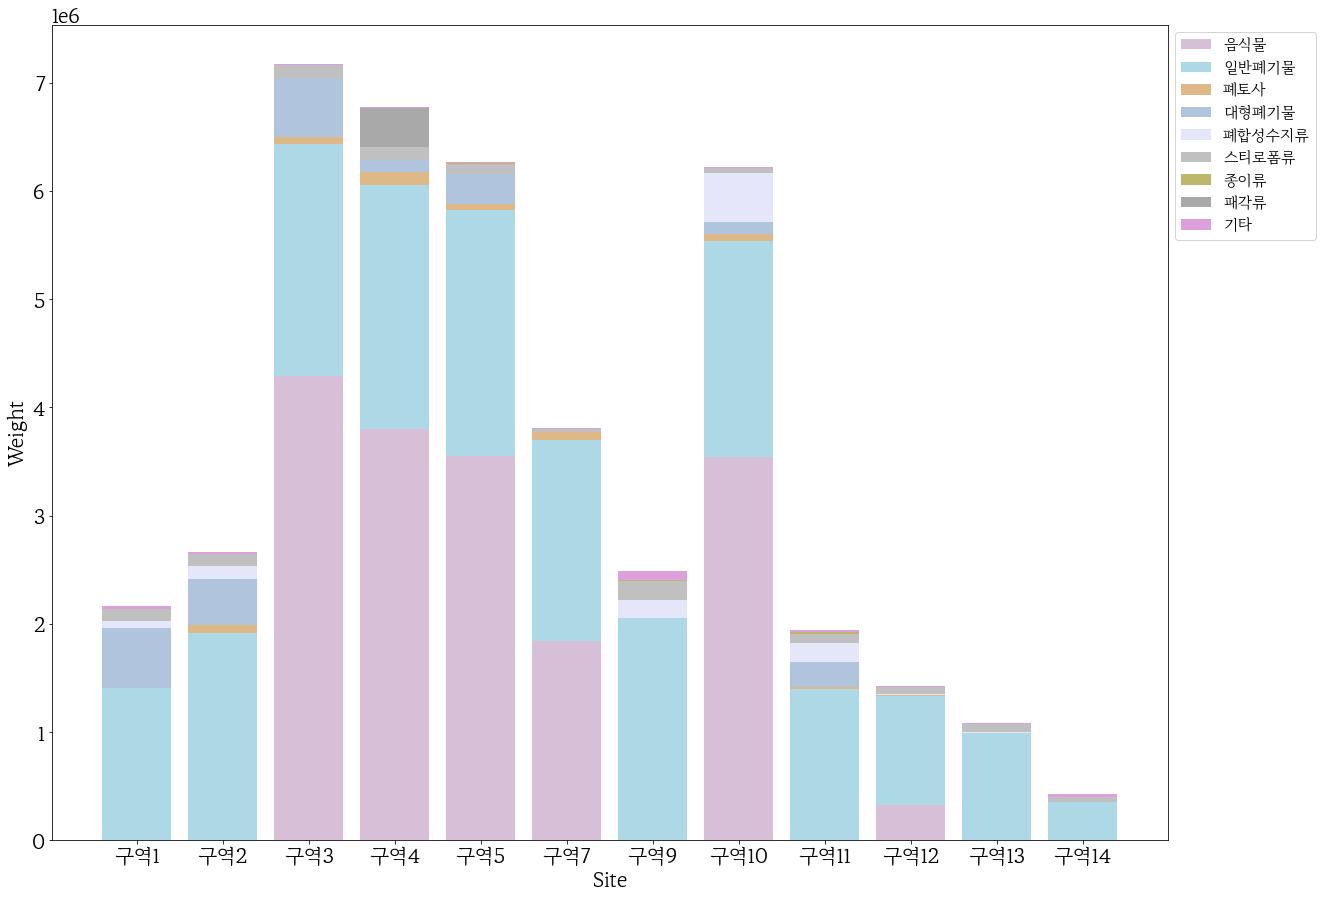

In [246]:
# size
plt.figure(figsize=(20, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','darkkhaki','darkgray','plum','lightcoral','lightgreen']

# bar graph
trash = [trash01,trash02,trash03,trash04,trash05,trash06,trash07,trash08,trash09]
used_category_v3 = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','종이류','패각류','기타']
bott = [0,0,0,0,0,0,0,0,0,0,0,0]

plt.xlabel('Site', fontsize=20)
plt.ylabel('Weight', fontsize=20)
# plt.ylim([0, 7000000])           ## 2019년과 비교를 위해서 y축 범위를 통일 (원본도 같음)

for trash_value in trash :
    trash_bar = plt.bar(topics,trash_value,bottom=bott,color=colr[trash.index(trash_value)])
    bott = np.array(bott) + np.array(trash_value)  ## list는 + 연산시 원소를 추가함. 따라서 누적을 위해서 array로 변경

plt.legend(labels=used_category_v3,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0))

- 음식물 제외

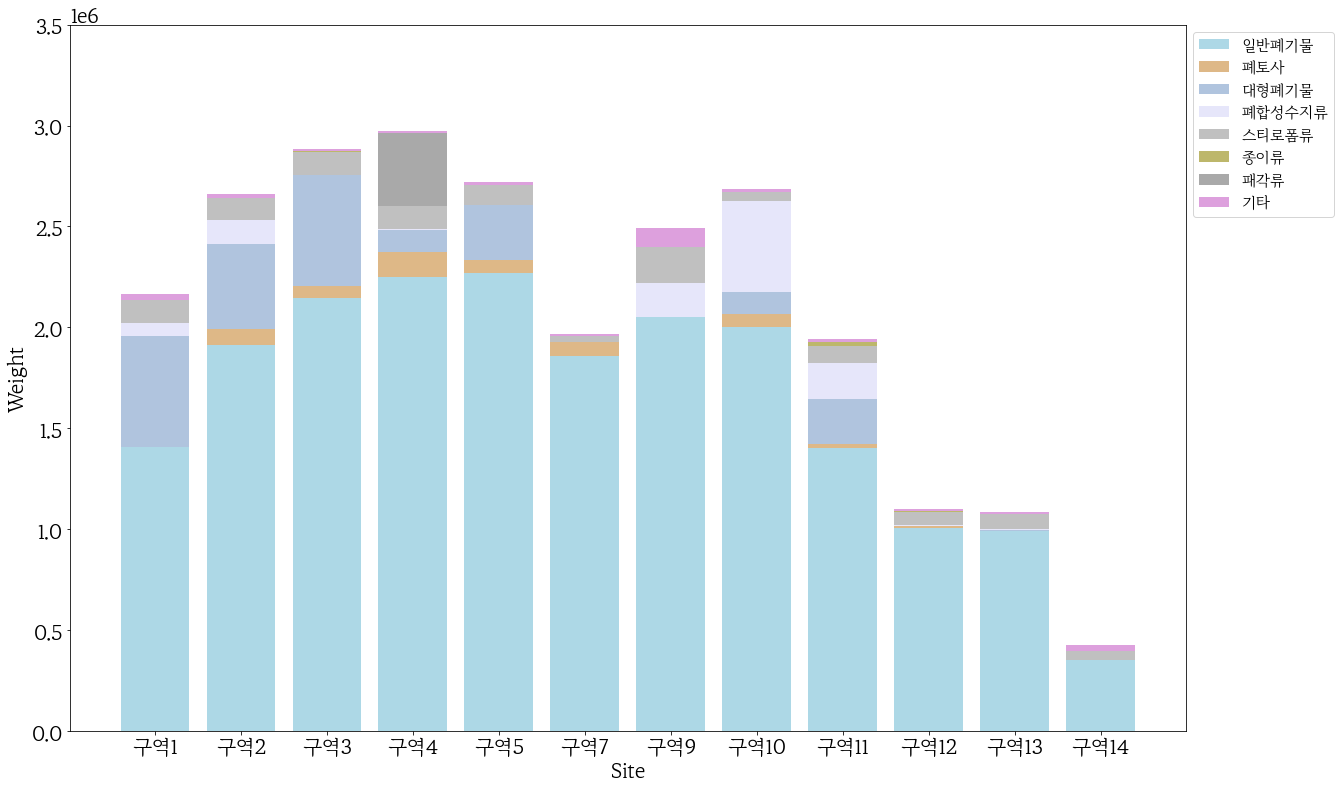

In [253]:
# size
plt.figure(figsize=(20, 13))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['lightblue','burlywood','lightsteelblue','lavender','silver','darkkhaki','darkgray','plum','lightcoral','lightgreen']

# bar graph
trash = [trash02,trash03,trash04,trash05,trash06,trash07,trash08,trash09]
used_category_v4 = ['일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','종이류','패각류','기타']
bott = [0,0,0,0,0,0,0,0,0,0,0,0]

plt.xlabel('Site', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.ylim([0, 3500000])           ## 2019년과 비교를 위해서 y축 범위를 통일 (원본도 같음)

for trash_value in trash :
    trash_bar = plt.bar(topics,trash_value,bottom=bott,color=colr[trash.index(trash_value)])
    bott = np.array(bott) + np.array(trash_value)  ## list는 + 연산시 원소를 추가함. 따라서 누적을 위해서 array로 변경

plt.legend(labels=used_category_v4,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0))

- 행정동(인구비율적용)

In [254]:
data_pop = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/2020_인구비율적용.csv', encoding='utf-8')
df_pop = pd.DataFrame(data_pop)
df_pop

행정동   구역 총중량         평균인구수    구역인구비율           추정값  구역 외 집계             계
0   동탄2동  2151120  35843.166670  0.462324  9.945154e+05    10620  1.005135e+06
1   동탄3동  2151120  41685.000000  0.537676  1.156605e+06     3430  1.160035e+06
2   병점2동  2587640  24475.333330  0.244131  6.317226e+05    11250  6.429726e+05
3    반월동  2587640  32140.666670  0.320589  8.295693e+05    19010  8.485793e+05
4    진안동  2587640  43639.000000  0.435280  1.126348e+06    45620  1.171968e+06
5    봉담읍  2672490  78314.166670  0.857145  2.290711e+06   146970  2.437681e+06
6    매송면  2672490   7270.166667  0.079572  2.126543e+05    41580  2.542343e+05
7    비봉면  2672490   5782.000000  0.063284  1.691251e+05    25080  1.942051e+05
8    남양읍  2731420  39345.666670  0.472333  1.290140e+06    98850  1.388990e+06
9    마도면  2731420   6839.500000  0.082106  2.242665e+05    45740  2.700065e+05
10   송산면  2731420  10814.333330  0.129823  3.546008e+05    63740  4.183408e+05
11   서신면  2731420   7004.166667  0.084083  2.296659e+05    33380  2.630459e+05
12   새솔동  2731420  19297.000000  0.231655  6.327466e+05     1840  6.345866e+05
13   향남읍  2516210  83492.666670  1.000000  2.516210e+06   206920  2.723130e+06
14   우정읍  1577950  17273.500000  0.419558  6.620422e+05    87910  7.499522e+05
15   장안면  1577950  10145.833330  0.246434  3.888598e+05   110010  4.988698e+05
16   양감면  1577950   3993.000000  0.096987  1.530399e+05   104500  2.575399e+05
17   팔탄면  1577950   9758.333333  0.237022  3.740081e+05    87120  4.611281e+05
18  동탄6동  2490300  29784.000000  0.280485  6.984929e+05      680  6.991729e+05
19  동탄7동  2490300  76403.333330  0.719515  1.791807e+06     4080  1.795887e+06
20  병점1동  2344860  28130.000000  0.368318  8.636547e+05    25380  8.890347e+05
21   화산동  2344860  23263.666670  0.304601  7.142473e+05    35600  7.498473e+05
22   기배동  2344860  13799.000000  0.180676  4.236606e+05   111420  5.350806e+05
23   정남면  2344860  11181.500000  0.146404  3.432974e+05   171870  5.151674e+05
24  동탄1동  1927010           NaN  1.000000  1.927010e+06     3430  1.930440e+06
25  동탄5동  1095360           NaN  1.000000  1.095360e+06     7070  1.102430e+06
26  동탄4동  1081960           NaN  1.000000  1.081960e+06     6850  1.088810e+06
27  동탄8동   428060           NaN  1.000000  4.280600e+05       20  4.280800e+05

#### Data Save
- modeling을 위해서 csv save

In [259]:
# csv save
df_20_01.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/2020_ml.csv', encoding='ANSI', index = False)

- Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc
import missingno as msno

In [ ]:
## 결측치를 별도의 머신러닝 모델을 만들어 채워넣을 수도 있음

# from sklearn.ensemble import RandomForestRegressor

# titanic_df["Age"].fillna(0, inplace=True)
# f_columns = ['Pclass', 'Sex', 'Fare', 'Embarked', 'Title', 'FamilySize']
# AgeNull = titanic_df[titanic_df['Age']==0]
# AgeNotNull = titanic_df[titanic_df['Age']!=0]
# X_train = AgeNotNull[f_columns]

# random_forest = RandomForestRegressor(n_estimators=200)
# random_forest.fit(X_train, AgeNotNull["Age"]) # 나이 정보가 있는 열로 나이 열을 맞추기 위한 모델을 학습

# train_pred = random_forest.predict(AgeNull[f_columns])
# AgeNull["Age"]= train_pred

# titanic_df = AgeNotNull.append(AgeNull)